In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os,sys
sys.path.append(os.path.abspath(os.path.join('..')))

from scripts.utils import *

#### Store DF

In [2]:
# Reading store csv files

store_df = pd.read_csv('../data/store.csv')
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [3]:
store_df.shape

(1115, 10)

In [4]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


#### Missing Value

In [5]:
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [6]:
# Percentage of null values
print(percentage_missing_values(store_df))

The telecom contains Store                         0.00
StoreType                     0.00
Assortment                    0.00
CompetitionDistance           0.27
CompetitionOpenSinceMonth    31.75
CompetitionOpenSinceYear     31.75
Promo2                        0.00
Promo2SinceWeek              48.79
Promo2SinceYear              48.79
PromoInterval                48.79
dtype: float64% missing values.


Filling the missing values

In [7]:
fill_null_values(store_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   float64
 5   CompetitionOpenSinceYear   1115 non-null   float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            1115 non-null   float64
 8   Promo2SinceYear            1115 non-null   float64
 9   PromoInterval              1114 non-null   object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


c:\Users\leuls\Pharmaceuticals\scripts\utils.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(0, inplace=True)
c:\Users\leuls\Pharmaceuticals\scripts\utils.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

In [8]:
print(percentage_missing_values(store_df))

The telecom contains Store                        0.00
StoreType                    0.00
Assortment                   0.00
CompetitionDistance          0.00
CompetitionOpenSinceMonth    0.00
CompetitionOpenSinceYear     0.00
Promo2                       0.00
Promo2SinceWeek              0.00
Promo2SinceYear              0.00
PromoInterval                0.09
dtype: float64% missing values.


Droping Duplicate Rows

In [22]:
duplicate_rows_df = store_df[store_df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 10)


#### Train DF

In [9]:
# Reading train csv files
train_df = pd.read_csv('../data/train.csv')
train_df.head()

C:\Users\leuls\AppData\Local\Temp\ipykernel_3504\3044246503.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('../data/train.csv')


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [13]:
train_df.shape

(1017209, 9)

In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [15]:
train_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

Droping Duplicate Rows

In [23]:
duplicate_rows_df = train_df[train_df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 9)


#### Test DF

In [10]:
# Reading test csv files
test_df = pd.read_csv('../data/test.csv')
test_df.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [16]:
test_df.shape

(41088, 8)

In [17]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


In [18]:
test_df.isnull().sum()

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

In [19]:
fill_null_values(test_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41088 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


c:\Users\leuls\Pharmaceuticals\scripts\utils.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(0, inplace=True)
c:\Users\leuls\Pharmaceuticals\scripts\utils.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

In [20]:
test_df.isnull().sum()

Id               0
Store            0
DayOfWeek        0
Date             0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

Droping Duplicste Rows

In [21]:
duplicate_rows_df = test_df[test_df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 8)


### Check for distribution in both training and test sets.

Train_dfing set promo distribution:
 Promo
0    0.618485
1    0.381515
Name: proportion, dtype: float64
Test_df set promo distribution:
 Promo
0    0.604167
1    0.395833
Name: proportion, dtype: float64


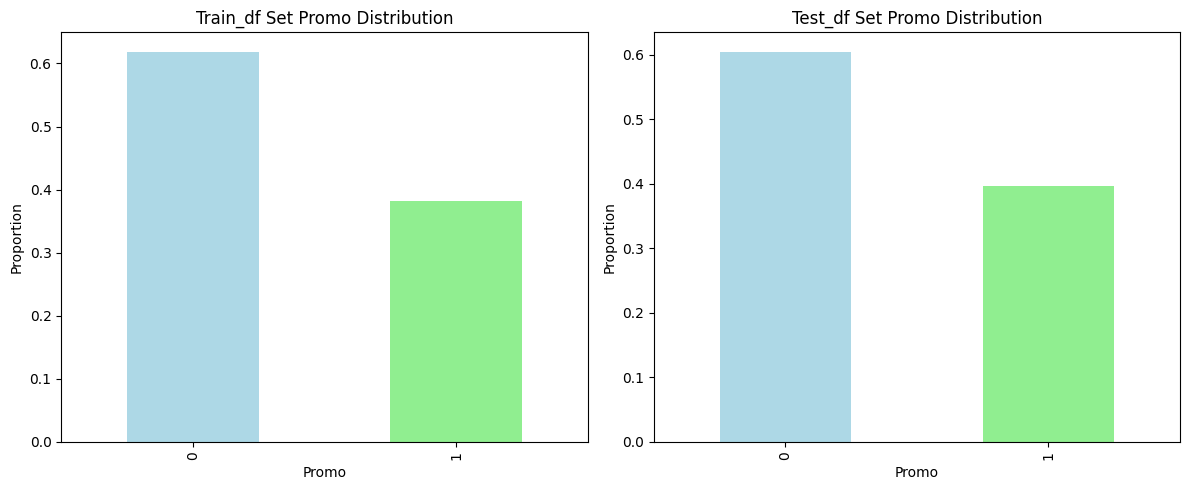

In [30]:

# Calculate promotion distribution for train_dfing set
train_df_promo_dist = train_df['Promo'].value_counts(normalize=True)

# Calculate promotion distribution for test_df set
test_df_promo_dist = test_df['Promo'].value_counts(normalize=True)

# Print the distributions
print("Train_dfing set promo distribution:\n", train_df_promo_dist)
print("Test_df set promo distribution:\n", test_df_promo_dist)

# Plot the distributions for visual comparison
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
train_df['Promo'].value_counts(normalize=True).plot(kind='bar', ax=ax[0], color=['lightblue', 'lightgreen'])
ax[0].set_title('Train_df Set Promo Distribution')
ax[0].set_xlabel('Promo')
ax[0].set_ylabel('Proportion')

test_df['Promo'].value_counts(normalize=True).plot(kind='bar', ax=ax[1], color=['lightblue', 'lightgreen'])
ax[1].set_title('Test_df Set Promo Distribution')
ax[1].set_xlabel('Promo')
ax[1].set_ylabel('Proportion')

plt.tight_layout()
plt.show()


### Check & compare sales behavior before, during, and after holidays

HolidayPeriod
After Holiday     5980.280555
Before Holiday    5263.000000
During Holiday    4684.874237
Name: Sales, dtype: float64


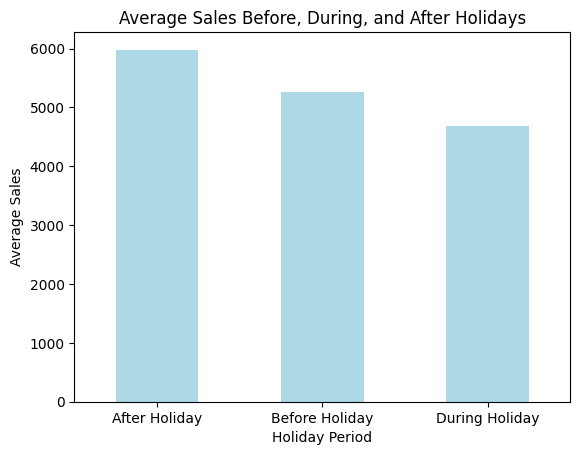

In [31]:
# Convert 'Date' column to datetime
train_df['Date'] = pd.to_datetime(train_df['Date'])

# Identify days before, during, and after holidays
train_df['BeforeHoliday'] = train_df['StateHoliday'].shift(-1).notna() & (train_df['StateHoliday'] == '0')  # Days before holiday
train_df['DuringHoliday'] = train_df['StateHoliday'] != '0'  # Days during holiday
train_df['AfterHoliday'] = train_df['StateHoliday'].shift(1).notna() & (train_df['StateHoliday'] == '0')  # Days after holiday

# Create a new column to label the period (Before, During, After)
train_df['HolidayPeriod'] = 'Regular'
train_df.loc[train_df['BeforeHoliday'], 'HolidayPeriod'] = 'Before Holiday'
train_df.loc[train_df['DuringHoliday'], 'HolidayPeriod'] = 'During Holiday'
train_df.loc[train_df['AfterHoliday'], 'HolidayPeriod'] = 'After Holiday'

# Calculate average sales for each period
sales_behavior = train_df.groupby('HolidayPeriod')['Sales'].mean()

# Print out the results
print(sales_behavior)

# Plot the sales behavior
sales_behavior.plot(kind='bar', color='lightblue')
plt.title('Average Sales Before, During, and After Holidays')
plt.ylabel('Average Sales')
plt.xlabel('Holiday Period')
plt.xticks(rotation=0)
plt.show()


### Find out any seasonal (Christmas, Easter, etc) purchase behaviors

Season
Christmas    1713.386992
Easter       5661.912135
Regular      5803.676658
Name: Sales, dtype: float64


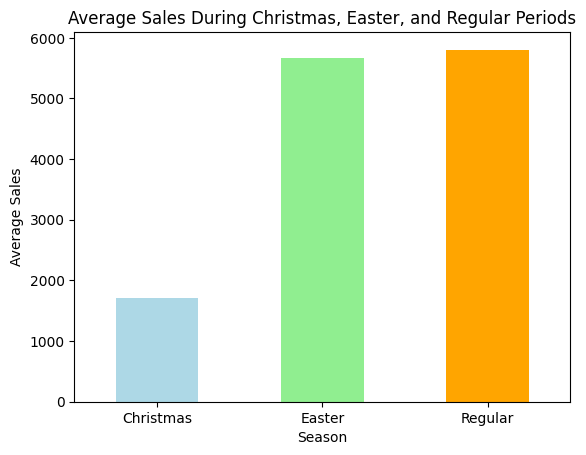

In [32]:
# Convert 'Date' to datetime format
train_df['Date'] = pd.to_datetime(train_df['Date'])

# Add a 'Month' and 'Day' column for easier filtering
train_df['Month'] = train_df['Date'].dt.month
train_df['Day'] = train_df['Date'].dt.day

# Mark Christmas (usually December 24th - 26th), Easter (around April, can vary by year), etc.
train_df['Season'] = 'Regular'

# Christmas (December 24th to 26th)
train_df.loc[(train_df['Month'] == 12) & (train_df['Day'].between(24, 26)), 'Season'] = 'Christmas'

# Easter (approx. April, we'll assume April 10th to 20th for simplicity)
train_df.loc[(train_df['Month'] == 4) & (train_df['Day'].between(10, 20)), 'Season'] = 'Easter'

# Add other seasonal events if necessary (e.g., Thanksgiving, Black Friday, etc.)
# Example for Easter: Update the date range accordingly to actual Easter dates for your data.

# Calculate average sales per season
seasonal_sales = train_df.groupby('Season')['Sales'].mean()

# Print out the seasonal behavior
print(seasonal_sales)

# Visualize the seasonal sales trends
seasonal_sales.plot(kind='bar', color=['lightblue', 'lightgreen', 'orange'])
plt.title('Average Sales During Christmas, Easter, and Regular Periods')
plt.ylabel('Average Sales')
plt.xlabel('Season')
plt.xticks(rotation=0)
plt.show()


### What can you say about the correlation between sales and the number of customers?

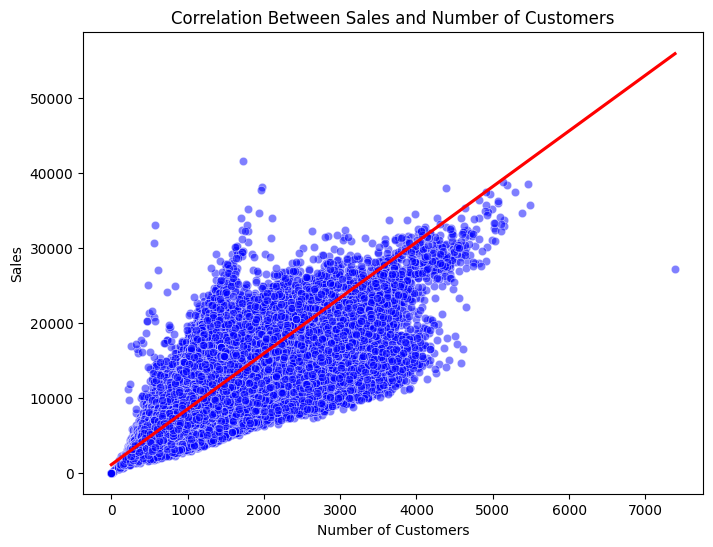

Correlation between Sales and Customers: 0.89


In [38]:

# Create a scatter plot to visualize the correlation between sales and customers
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Customers', y='Sales', data=train_df, color='blue', alpha=0.5)

# Add a trend line (optional, but helps to see the relationship better)
sns.regplot(x='Customers', y='Sales', data=train_df, scatter=False, color='red')

plt.title('Correlation Between Sales and Number of Customers')
plt.xlabel('Number of Customers')
plt.ylabel('Sales')
plt.show()

# Calculate the correlation coefficient
correlation = train_df['Sales'].corr(train_df['Customers'])
print(f"Correlation between Sales and Customers: {correlation:.2f}")


### How does promo affect sales?

Average sales, customer count, and sales per customer during and without promotions:
             Sales   Customers  Sales per Customer
Promo                                             
0      4406.050805  517.823542            8.508788
1      7991.152046  820.098815            9.744133


C:\Users\leuls\AppData\Local\Temp\ipykernel_3504\1175784300.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=promo_sales.index, y=promo_sales['Sales'], ax=ax[0], palette='Blues')
C:\Users\leuls\AppData\Local\Temp\ipykernel_3504\1175784300.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=promo_sales.index, y=promo_sales['Customers'], ax=ax[1], palette='Greens')
C:\Users\leuls\AppData\Local\Temp\ipykernel_3504\1175784300.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=promo_sales.index, y=promo_sales['Sales per Customer'], a

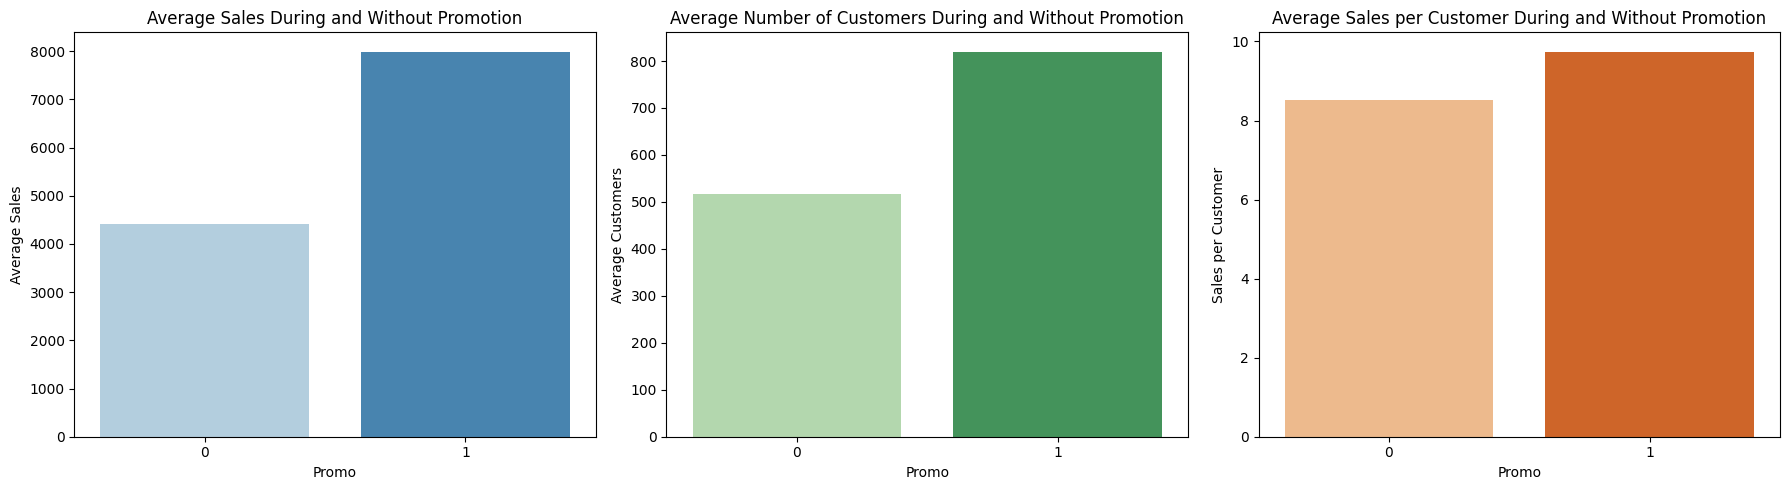

In [33]:


# Calculate the average sales and customers with and without promotion
promo_sales = train_df.groupby('Promo').agg({'Sales': 'mean', 'Customers': 'mean'})
promo_sales['Sales per Customer'] = promo_sales['Sales'] / promo_sales['Customers']

# Print the results
print("Average sales, customer count, and sales per customer during and without promotions:")
print(promo_sales)

# Plot the comparison
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# Sales comparison
sns.barplot(x=promo_sales.index, y=promo_sales['Sales'], ax=ax[0], palette='Blues')
ax[0].set_title('Average Sales During and Without Promotion')
ax[0].set_xlabel('Promo')
ax[0].set_ylabel('Average Sales')

# Customer count comparison
sns.barplot(x=promo_sales.index, y=promo_sales['Customers'], ax=ax[1], palette='Greens')
ax[1].set_title('Average Number of Customers During and Without Promotion')
ax[1].set_xlabel('Promo')
ax[1].set_ylabel('Average Customers')

# Sales per customer comparison
sns.barplot(x=promo_sales.index, y=promo_sales['Sales per Customer'], ax=ax[2], palette='Oranges')
ax[2].set_title('Average Sales per Customer During and Without Promotion')
ax[2].set_xlabel('Promo')
ax[2].set_ylabel('Sales per Customer')

plt.tight_layout()
plt.show()


### Could the promos be deployed in more effective ways?

C:\Users\leuls\AppData\Local\Temp\ipykernel_3504\3623570468.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Store', y='Sales Growth (%)', data=high_sales_growth_stores.head(10), palette='Blues')


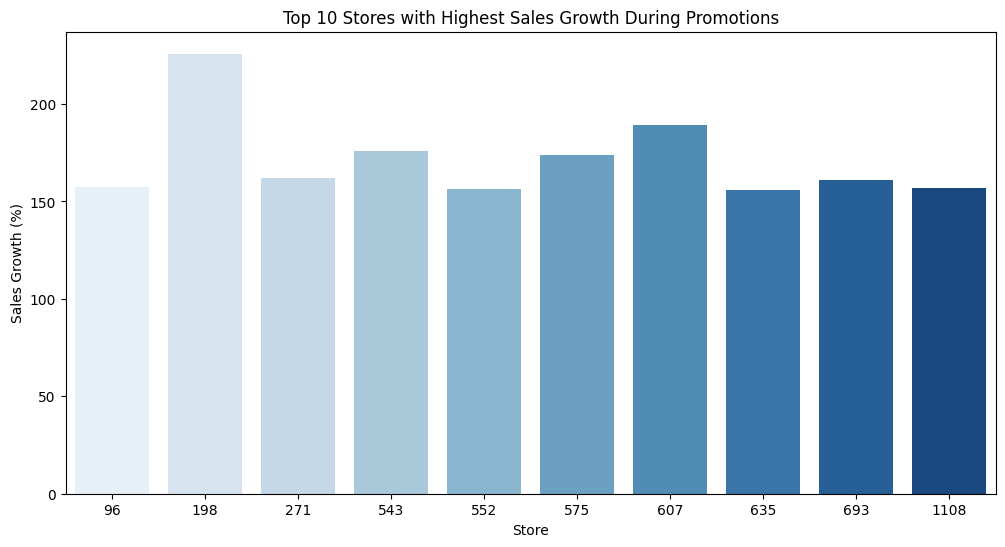

C:\Users\leuls\AppData\Local\Temp\ipykernel_3504\3623570468.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Store', y='Customer Growth (%)', data=promo_effective_stores.sort_values(by='Customer Growth (%)', ascending=False).head(10), palette='Greens')


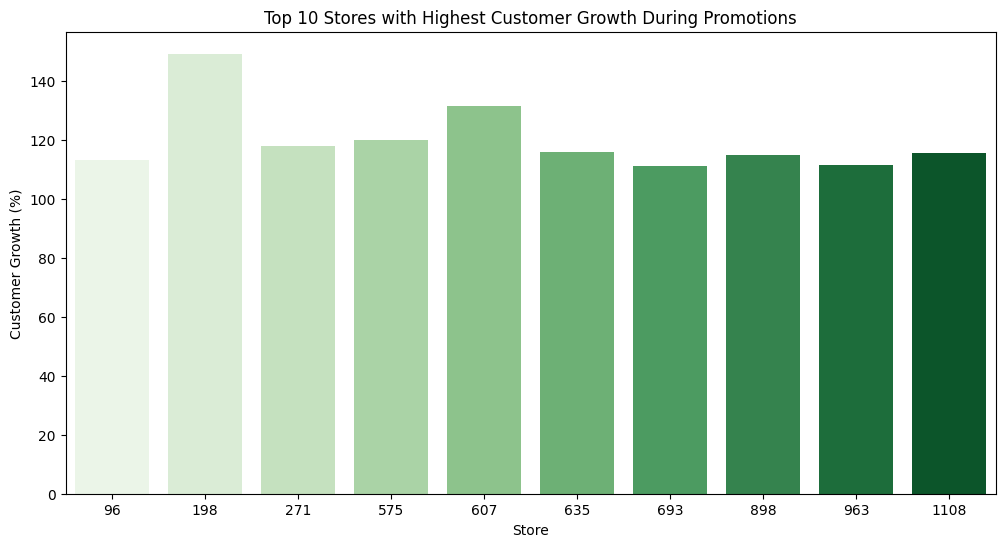

Stores with minimal sales growth during promotions: [ 85 259 262 274 353 423 676 948]


In [34]:

# Merge store info with train_df dataset
train_df = pd.merge(train_df, store_df, on='Store')

# Group by 'Store' and 'Promo' to evaluate sales and customer behavior for each store during and without promotions
store_promo_analysis = train_df.groupby(['Store', 'Promo']).agg({
    'Sales': 'mean',
    'Customers': 'mean'
}).reset_index()

# Calculate the sales and customer growth percentage during promotions
store_promo_analysis['Sales Growth (%)'] = store_promo_analysis.groupby('Store')['Sales'].pct_change() * 100
store_promo_analysis['Customer Growth (%)'] = store_promo_analysis.groupby('Store')['Customers'].pct_change() * 100

# Filter for stores where promotions are active (Promo = 1)
promo_effective_stores = store_promo_analysis[store_promo_analysis['Promo'] == 1]

# Display stores with high sales growth during promotions
high_sales_growth_stores = promo_effective_stores.sort_values(by='Sales Growth (%)', ascending=False)

# Plot the top 10 stores with the highest sales growth during promotions
plt.figure(figsize=(12, 6))
sns.barplot(x='Store', y='Sales Growth (%)', data=high_sales_growth_stores.head(10), palette='Blues')
plt.title('Top 10 Stores with Highest Sales Growth During Promotions')
plt.xlabel('Store')
plt.ylabel('Sales Growth (%)')
plt.show()

# Show top stores for customer growth as well
plt.figure(figsize=(12, 6))
sns.barplot(x='Store', y='Customer Growth (%)', data=promo_effective_stores.sort_values(by='Customer Growth (%)', ascending=False).head(10), palette='Greens')
plt.title('Top 10 Stores with Highest Customer Growth During Promotions')
plt.xlabel('Store')
plt.ylabel('Customer Growth (%)')
plt.show()

# Analyze stores with little to no growth during promotions
low_sales_growth_stores = promo_effective_stores[promo_effective_stores['Sales Growth (%)'] < 10]
print("Stores with minimal sales growth during promotions:", low_sales_growth_stores['Store'].unique())


### Trends of customer behavior during store opening and closing times

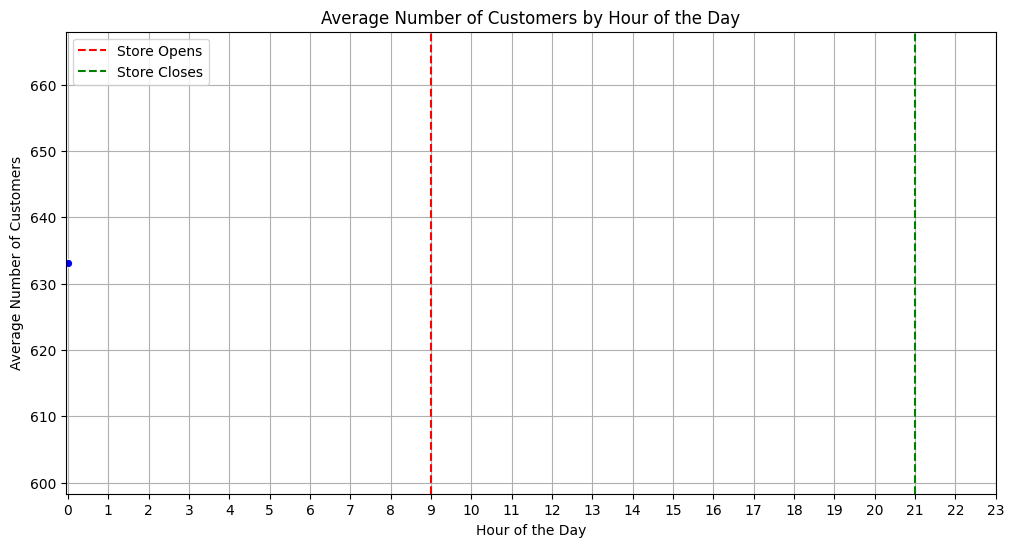

In [35]:
# Convert 'Date' to datetime format
train_df['Date'] = pd.to_datetime(train_df['Date'])

# Extract hour from 'Date'
train_df['Hour'] = train_df['Date'].dt.hour

# Group by hour and calculate average customers
hourly_customers = train_df.groupby('Hour')['Customers'].mean().reset_index()

# Plotting the trends of customer behavior during opening and closing times
plt.figure(figsize=(12, 6))
sns.lineplot(x='Hour', y='Customers', data=hourly_customers, marker='o', color='blue')

plt.title('Average Number of Customers by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Customers')
plt.xticks(range(0, 24))  # Show all hours
plt.grid()
plt.axvline(x=9, color='red', linestyle='--', label='Store Opens')
plt.axvline(x=21, color='green', linestyle='--', label='Store Closes')
plt.legend()
plt.show()


### Which stores are open on all weekdays? How does that affect their sales on weekends?

C:\Users\leuls\AppData\Local\Temp\ipykernel_3504\139394503.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Store Group', y='Average Weekend Sales', data=sales_comparison, palette='pastel')


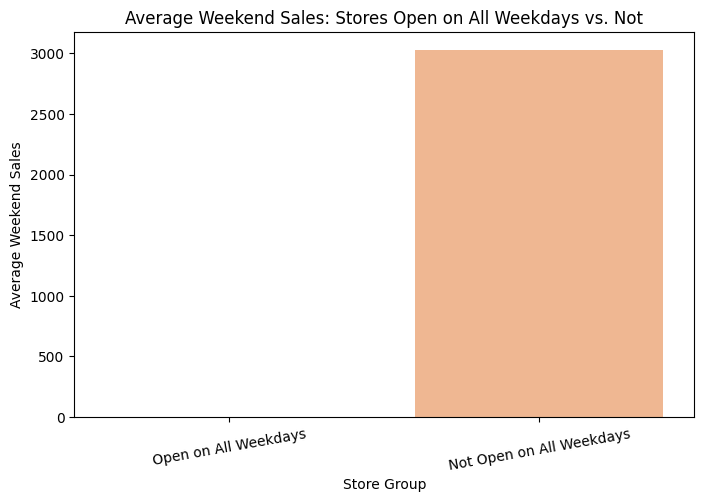

In [36]:
# Convert 'Date' to datetime format and extract day of the week
train_df['Date'] = pd.to_datetime(train_df['Date'])
train_df['DayOfWeek'] = train_df['Date'].dt.dayofweek  # Monday=0, Sunday=6

# Check which stores are open on all weekdays
weekdays = [0, 1, 2, 3, 4]  # Monday to Friday
open_weekdays = train_df[train_df['Open'] == 1].groupby('Store')['DayOfWeek'].unique()

# Identify stores open on all weekdays
stores_open_all_weekdays = [store for store, days in open_weekdays.items() if set(days) == set(weekdays)]

# Filter weekend sales for these stores
weekend_sales_open_all = train_df[(train_df['Store'].isin(stores_open_all_weekdays)) & (train_df['DayOfWeek'].isin([5, 6]))]
weekend_sales_not_open_all = train_df[~train_df['Store'].isin(stores_open_all_weekdays) & (train_df['DayOfWeek'].isin([5, 6]))]

# Calculate average weekend sales for both groups
avg_sales_open_all = weekend_sales_open_all['Sales'].mean()
avg_sales_not_open_all = weekend_sales_not_open_all['Sales'].mean()

# Create a summary DataFrame for plotting
sales_comparison = pd.DataFrame({
    'Store Group': ['Open on All Weekdays', 'Not Open on All Weekdays'],
    'Average Weekend Sales': [avg_sales_open_all, avg_sales_not_open_all]
})

# Plot the comparison
plt.figure(figsize=(8, 5))
sns.barplot(x='Store Group', y='Average Weekend Sales', data=sales_comparison, palette='pastel')
plt.title('Average Weekend Sales: Stores Open on All Weekdays vs. Not')
plt.ylabel('Average Weekend Sales')
plt.xticks(rotation=10)
plt.show()


### Check how the assortment type affects sales

C:\Users\leuls\AppData\Local\Temp\ipykernel_3504\709285729.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sales', y='Assortment', data=assortment_sales, palette='viridis')


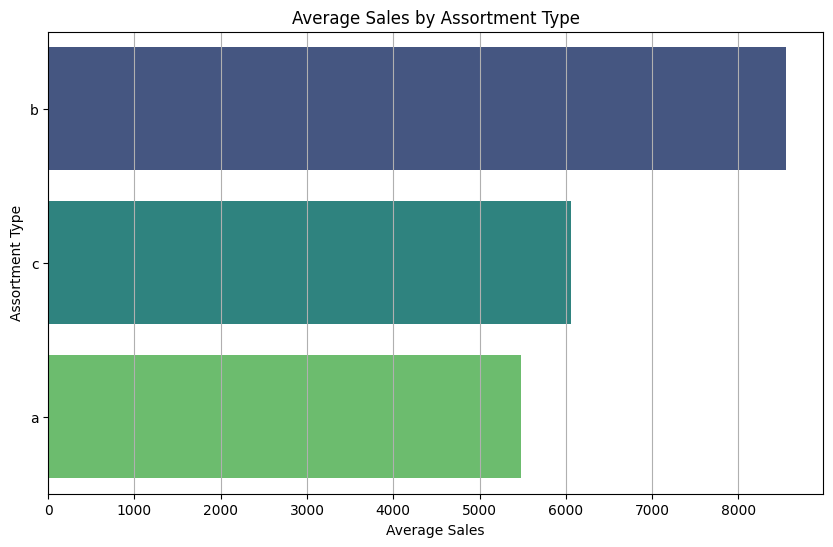

In [37]:
# Group by 'Assortment' and calculate average sales
assortment_sales = train_df.groupby('Assortment')['Sales'].mean().reset_index()

# Sort the results for better visualization
assortment_sales = assortment_sales.sort_values(by='Sales', ascending=False)

# Plotting the average sales by assortment type
plt.figure(figsize=(10, 6))
sns.barplot(x='Sales', y='Assortment', data=assortment_sales, palette='viridis')
plt.title('Average Sales by Assortment Type')
plt.xlabel('Average Sales')
plt.ylabel('Assortment Type')
plt.grid(axis='x')
plt.show()
